In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
db = pd.read_csv("Salary.csv")


In [4]:
db.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
db.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [6]:
X = db["YearsExperience"].values
Y = db["Salary"].values


In [7]:
db.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [8]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5, 11.2, 11.5, 12.3,
       12.9, 13.5])

In [9]:
Y


array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872, 127345, 126756,
       128765, 135675, 139465], dtype=int64)

In [10]:
db = db.sample(frac=1,random_state=42).reset_index(drop=True)

In [11]:
split_index = int(0.7*len(db))
train_data = db[:split_index]
test_data =  db[split_index:]

In [12]:
X_train = train_data["YearsExperience"].values
Y_train = train_data["Salary"].values

X_test = test_data["YearsExperience"].values
Y_test = test_data["Salary"].values

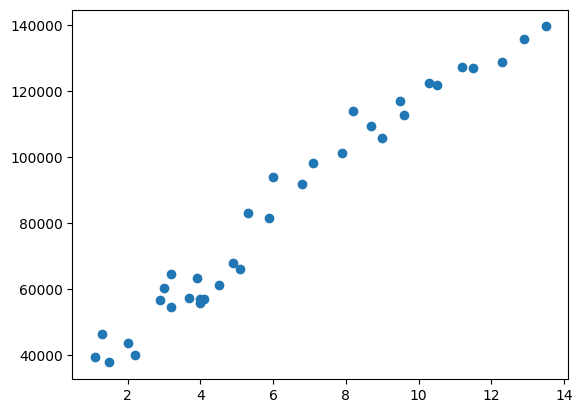

In [13]:
plt.scatter(X,Y)

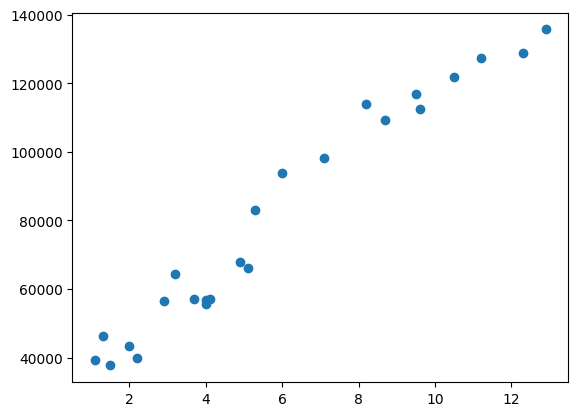

In [14]:
plt.scatter(X_train,Y_train)

In [19]:
m = 0
b = 0
alpha = 0.0001  # Increased from 0.00001
it = 10000      # Increased from 1000
n = len(X_train)

for epoch in range(it):
    y_pred = m * X_train + b
    error = Y_train - y_pred

    dm = (-2/n) * sum(X_train * error)
    db = (-2/n) * sum(error)

    m = m - alpha * dm
    b = b - alpha * db

    if epoch % 1000 == 0:
        mse = (error**2).mean()
        print(f"Epoch {epoch}, MSE: {mse:.2f}, m: {m:.2f}, b: {b:.2f}")

Epoch 0, MSE: 7523132433.54, m: 117.43, b: 16.09
Epoch 1000, MSE: 214140519.93, m: 12035.19, b: 2897.44
Epoch 2000, MSE: 196931762.26, m: 11873.49, b: 4199.05
Epoch 3000, MSE: 181454595.33, m: 11719.43, b: 5433.35
Epoch 4000, MSE: 167534758.87, m: 11573.32, b: 6603.90
Epoch 5000, MSE: 155015552.48, m: 11434.75, b: 7714.01
Epoch 6000, MSE: 143756043.14, m: 11303.35, b: 8766.78
Epoch 7000, MSE: 133629478.67, m: 11178.72, b: 9765.18
Epoch 8000, MSE: 124521860.84, m: 11060.54, b: 10712.02
Epoch 9000, MSE: 116330662.08, m: 10948.46, b: 11609.97


In [20]:
def r2_score(y_true,y_pred):
    mean_y = sum(y_true)/len(y_true)
    ss_total = sum((y - mean_y)**2 for y in y_true)
    ss_res = sum((y_t - y_p) ** 2 for y_t, y_p in zip(y_true, y_pred))
    r2 = 1 - (ss_res / ss_total)
    return r2

In [21]:
Y_pred_train = m * X_train + b
print(f"R2 Score (Train Data): {r2_score(Y_train, Y_pred_train):.4f}")

R2 Score (Train Data): 0.8965
